<a href="https://colab.research.google.com/github/bootnoodles/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [24]:
import pandas as pd 
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [5]:
sample20 = df.sample(n=20, random_state=42)
sample200 = df.sample(n=200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [6]:
print(sample20['ConvertedSalary'].mean())
sample200['ConvertedSalary'].mean()


55752.2


68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would trust the one with 200 rows as the more data we have the closer our answer will be to the truth. The non-technical person would know that the more information on the average the better.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Use more samples or larger samples of the data to cover all areas of the information that may have been missed.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [13]:

def confidence_interval(sample, confidence_level=.95):
  # make sure we're working with a numpy array
  sample = np.array(sample)
  # sample mean
  x_bar = np.mean(sample)
  # SAMPLE standard deviation EXTRA PARAMETER!
  s = np.std(sample, ddof=1)
  # sample size
  n = len(sample)
  # t-statistic for our confidence level %
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)

  std_err = s / np.sqrt(n)

  moe = t * std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [30]:
CI1 = (confidence_interval(sample20['ConvertedSalary']))

In [33]:
CI2 = (confidence_interval(sample200['ConvertedSalary']))

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [20]:
print('The margin of error for the dataset containing 20 samples is 19947.096903744638')
print('The margin of error for the dataset containing 200 samples is 7958.196195520917')

The margin of error for the dataset containing 20 samples is 19947.096903744638
The margin of error for the dataset containing 200 samples is 7958.196195520917


In [18]:
print('The margin error is how far we can be from the mean within this dataset')

The margin error is how far we can be from the mean within this dataset


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

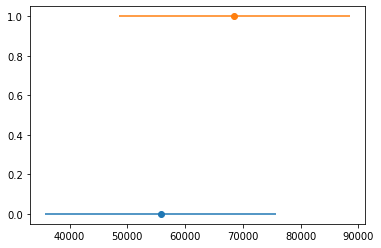

In [46]:
plt.errorbar(x=CI1[1], y=0, xerr=CI1[3], fmt='o')
plt.errorbar(x=CI2[1], y=1, xerr=CI1[3], fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

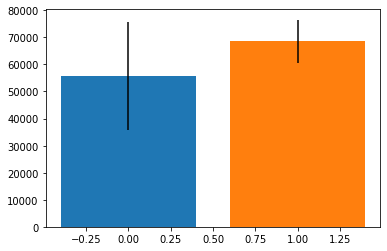

In [44]:
plt.bar(x=0, height=CI1[1], yerr=CI1[3])
plt.bar(x=1, height=CI2[1], yerr=CI2[3])
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [49]:
CI3 = confidence_interval(df['ConvertedSalary'])
print(CI3)
print('Our margin of error drops to $2153')

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is relative to the points of data while accuracy is relative to the target thats trying ot be reached.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

If you were to take 100 samples, with a confidence interval of 95% means that out of every 100 samples we should expect our confidence interval to contain the sample mean 95/100 of those times.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.